#Assignment04. Origin-Destination Analysis with NetworkX

##Install and Import Packages

In [1]:
# Install packages

!pip install fiona
!pip install geopandas
!pip install folium
!pip install sodapy -q
!pip install adjustText
!pip install plotly --upgrade
!pip install contextily
!pip install mapclassify
!pip install chart-studio
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install pygeos

     |████████████████████████████████| 15.4 MB 16.1 MB/s 
     |████████████████████████████████| 1.0 MB 13.9 MB/s 
     |████████████████████████████████| 6.3 MB 46.5 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=9bfed89709db89718b6570dcf9cd84ecfc9954e97b8033bdc951d23c981f0d8f
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NE

In [2]:
!pip install decorator
!pip install pandapower

     |████████████████████████████████| 5.8 MB 12.3 MB/s 
     |████████████████████████████████| 149 kB 48.1 MB/s 
     |████████████████████████████████| 3.6 MB 57.4 MB/s 
  Created wheel for pandapower: filename=pandapower-2.7.0-py3-none-any.whl size=5777358 sha256=1e2af88aa0f2a9a57e4c356773b9208619bb90ed1e1956ec4e9eb5c78a44a105
  Stored in directory: /root/.cache/pip/wheels/ff/e6/b6/c9218d5a45a02f4bdb220272f2bac4f59c5b73ed08a08125c3
Successfully built pandapower


In [3]:
# Import packages
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np

# Load a required package 
# This is a library for accessing and parsing data through URLs
from urllib.parse import urlencode
import urllib.request, json 
from bs4 import BeautifulSoup # for web scraping
import fiona
import plotly.express as px
import geopandas as gpd
import adjustText as aT
import seaborn as sns # visualization styling package
import plotly.graph_objects as go
import urllib, json
import chart_studio.plotly as py
import chart_studio.tools as tls
import os
import plotly
from sodapy import Socrata
from IPython.display import Image, display
from shapely.geometry import shape
from shapely.geometry import Point 
from shapely.geometry import Polygon
import time
from shapely.geometry import shape
import contextily as ctx
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

import networkx as nx #library supporting networks

%matplotlib inline 
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
import folium
from folium.plugins import HeatMap

#Chart Studio API
import chart_studio
username='bkirthi'
api_key='PHHYaOZKZDA7BF3nUUtO'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [4]:
# import more packages
import plotly.io as pio
pio.renderers.default = "colab"
access_token = 'pk.eyJ1IjoiYmtpcnRoaSIsImEiOiJja3VpdzFiMnoycnYyMzBtYXM1aW1uemd0In0.knHw7eYrN8DvrrBHZugW8Q'
px.set_mapbox_access_token(access_token) # for interactive plotly viz

import plotly.graph_objects as go
import chart_studio.plotly as py
import chart_studio.tools as tls

##Import Citibike Rideshare Data
Downloadable from https://www.citibikenyc.com/system-data. Click “Downloadable files of Citi Bike trip data” or “Download Citi Bike trip history data”.

Here, download the data for sepust 2021.


In [5]:
# clone github
!git clone https://github.com/kirthi-b/CitiBike-NetworkX

Cloning into 'CitiBike-NetworkX'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 24 (delta 6), reused 19 (delta 4), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [6]:
sep = pd.read_csv("/content/CitiBike-NetworkX/Data/202109.csv")

In [7]:
sep.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,228F2E2FEBFBF843,classic_bike,2021-09-11 16:03:10,2021-09-11 16:20:57,Jersey & 6th St,JC027,Astor Place,JC077,40.725289,-74.045572,40.719282,-74.071262,casual
1,DCDBDC0A5178BAB5,classic_bike,2021-09-14 17:27:50,2021-09-14 17:34:18,Jersey & 6th St,JC027,Marin Light Rail,JC013,40.725289,-74.045572,40.714584,-74.042817,member
2,DD7AD7B81588187B,docked_bike,2021-09-04 20:29:34,2021-09-04 20:41:17,12 St & Sinatra Dr N,HB201,4 St & Grand St,HB301,40.750604,-74.024020,40.742258,-74.035111,casual
3,4D3CFEEB6E3E514B,classic_bike,2021-09-16 17:26:37,2021-09-16 17:32:48,Jersey & 6th St,JC027,Marin Light Rail,JC013,40.725289,-74.045572,40.714584,-74.042817,member
4,D05FC6DDE1112F08,classic_bike,2021-09-16 18:05:35,2021-09-16 18:16:02,Jersey & 6th St,JC027,Columbus Dr at Exchange Pl,JC106,40.725289,-74.045572,40.716870,-74.032810,member


In [8]:
print(sep.shape)

(97290, 13)


In [9]:
sep = sep[['ride_id','started_at','ended_at','start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng']]

In [10]:
sep_sub = sep_rev = sep[['start_station_name','start_lat','start_lng']]
sep_sub.shape[0]

97290

In [11]:
sep_rev = sep[['end_station_name','end_lat','end_lng']]
sep_rev = sep_rev.rename(columns={"end_station_name":"start_station_name","end_lat":"start_lat","end_lng":"start_lng"})
sep_rev.shape[0]

97290

In [12]:
#get count of rides per route
sep_count = sep.groupby(['start_station_name','end_station_name']).size().to_frame('count').reset_index()
sep_df = pd.DataFrame(sep_count)
sep_count.head()

,start_station_name,end_station_name,count
0,11 St & Washington St,11 St & Washington St,250
1,11 St & Washington St,12 St & Sinatra Dr N,22
2,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,50
3,11 St & Washington St,4 St & Grand St,35
4,11 St & Washington St,6 St & Grand St,53


In [13]:
#get list of all routes
tot = pd.concat([sep_sub,sep_rev])
tot_count = tot.groupby(['start_station_name']).size().to_frame('count').reset_index()
tot_df = pd.DataFrame(tot_count)
tot_df.head()

,start_station_name,count
0,10 Ave & W 14 St,1
1,11 Ave & W 59 St,1
2,11 St & Washington St,4069
3,12 Ave & W 40 St,3
4,12 St & Sinatra Dr N,3510


In [14]:
tot.shape[0]

194580

In [15]:
tot = tot.drop_duplicates()
tot.shape[0]

213

In [16]:
tot = pd.merge(tot, tot_df, on="start_station_name")

In [17]:
tot.head()

,start_station_name,start_lat,start_lng,count
0,Jersey & 6th St,40.725289,-74.045572,1477
1,Jersey & 6th St,40.725289,-74.045572,1477
2,12 St & Sinatra Dr N,40.750604,-74.024020,3510
3,12 St & Sinatra Dr N,40.750604,-74.024020,3510
4,Columbus Dr at Exchange Pl,40.716870,-74.032810,3963


##Create a Network with CitiBike Station Names as Nodes

In [18]:
#create a dictionary of station locations
stations={}
for c in range(len(tot)):
    stations[tot['start_station_name'][c]]=(tot['start_lng'][c],tot['start_lat'][c])

In [19]:
stations

{'10 Ave & W 14 St': (-74.00831580162048, 40.74198159994023),
 '11 Ave & W 59 St': (-73.99046033620834, 40.771496710544405),
 '11 St & Washington St': (-74.02715, 40.749984000000005),
 '12 Ave & W 40 St': (-74.00277700000001, 40.760875),
 '12 St & Sinatra Dr N': (-74.0240201354027, 40.750604142368964),
 '14 St Ferry - 14 St & Shipyard Ln': (-74.02435200000001, 40.752959999999995),
 '34 Ave & 38 St': (-73.921631, 40.756913),
 '4 St & Grand St': (-74.035111, 40.742258),
 '5 Corners Library': (-74.059503, 40.734961),
 '6 Ave & Broome St': (-74.00473000000001, 40.724309999999996),
 '6 Ave & W 33 St': (-73.98848395, 40.74901271),
 '6 Ave & W 45 St': (-73.98263100000001, 40.756951),
 '6 St & Grand St': (-74.034501, 40.744398),
 '7 St & Monroe St': (-74.037977, 40.746413000000004),
 '8 Ave & W 33 St': (-73.993934, 40.751551),
 '8 St & Washington St': (-74.028199, 40.745984),
 '9 St HBLR - Jackson St & 8 St': (-74.038412, 40.747907),
 'Adams St & 11 St': (-74.033541, 40.750916),
 'Albany St & 

In [20]:
#create a network with station names as nodes for sepust
sep_rides=nx.DiGraph()
sep_rides.add_nodes_from(sep['start_station_name'])

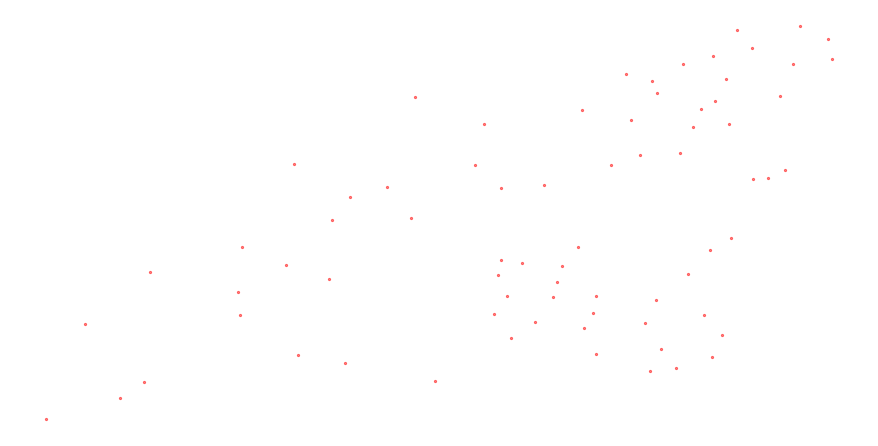

In [21]:
#visualize all the world airport cities
plt.figure(figsize = (12,6))
nx.draw(sep_rides, pos=stations, with_labels=False, arrows=False, node_size=5,
       node_color='red', alpha=0.5)

##Add Edges

In [22]:
# create list of edges as tuples
# create list of 0 first

#for sepust
sep_EN=len(sep_df.index)
edgelist=[0]*sep_EN
print (edgelist[:5])

[0, 0, 0, 0, 0]


In [23]:
# create list of edges as tuples for sepust
for j in range(0,sep_EN):
    edgelist[j]=(sep_df['start_station_name'][j],sep_df['end_station_name'][j], sep_df['count'][j])
edgelist

[('11 St & Washington St', '11 St & Washington St', 250),
 ('11 St & Washington St', '12 St & Sinatra Dr N', 22),
 ('11 St & Washington St', '14 St Ferry - 14 St & Shipyard Ln', 50),
 ('11 St & Washington St', '4 St & Grand St', 35),
 ('11 St & Washington St', '6 St & Grand St', 53),
 ('11 St & Washington St', '7 St & Monroe St', 30),
 ('11 St & Washington St', '8 St & Washington St', 94),
 ('11 St & Washington St', '9 St HBLR - Jackson St & 8 St', 56),
 ('11 St & Washington St', 'Adams St & 11 St', 56),
 ('11 St & Washington St', 'Baldwin at Montgomery', 4),
 ('11 St & Washington St', 'Bergen Ave & Stegman St', 1),
 ('11 St & Washington St', 'Bloomfield St & 15 St', 27),
 ('11 St & Washington St', 'Church Sq Park - 5 St & Park Ave', 87),
 ('11 St & Washington St', 'City Hall', 1),
 ('11 St & Washington St', 'Clinton St & 7 St', 20),
 ('11 St & Washington St', 'Columbus Dr at Exchange Pl', 7),
 ('11 St & Washington St', 'Columbus Drive', 2),
 ('11 St & Washington St', 'Columbus Park - 

In [24]:
# add edges to the network
sep_rides.add_weighted_edges_from(edgelist)

In [25]:
print (sep_rides.in_degree(weight='weight')['Newport PATH'])
print (sep_rides.out_degree(weight='weight')['Newport PATH'])

2270
2278


###Incoming and outgoing degree

In [26]:
# Convert pandas dataframe and join two information - sepust
in_degree = pd.DataFrame.from_dict(dict(sep_rides.in_degree()), orient='index').reset_index()
in_degree.columns = ['start_station_name', 'in_degree']
out_degree = pd.DataFrame.from_dict(dict(sep_rides.out_degree()), orient='index').reset_index()
out_degree.columns = ['start_station_name', 'out_degree']

in_degree.head()

,start_station_name,in_degree
0,Jersey & 6th St,60
1,12 St & Sinatra Dr N,49
2,Columbus Dr at Exchange Pl,70
3,Columbus Park - Clinton St & 9 St,52
4,Bergen Ave & Stegman St,44


In [27]:
in_out_degree = pd.merge(in_degree, out_degree, how='outer', on='start_station_name')
in_out_degree.sort_values(by='in_degree', ascending=False).head(10)

,start_station_name,in_degree,out_degree
19,Newport Pkwy,73,72
33,Newport PATH,72,71
56,Newark Ave,72,69
18,Washington St,72,76
51,Grove St PATH,72,74
52,Hamilton Park,72,71
60,Hoboken Terminal - Hudson St & Hudson Pl,71,68
73,Manila & 1st,70,65
37,Warren St,70,70
28,Hoboken Terminal - River St & Hudson Pl,70,69


In [28]:
print(sep_rides.in_degree())
print(sep_rides.out_degree())

[('Jersey & 6th St', 60), ('12 St & Sinatra Dr N', 49), ('Columbus Dr at Exchange Pl', 70), ('Columbus Park - Clinton St & 9 St', 52), ('Bergen Ave & Stegman St', 44), ('Marin Light Rail', 68), ('Grand St & 2 St', 59), ('4 St & Grand St', 53), ('Glenwood Ave', 47), ('Brunswick & 6th', 60), ('Van Vorst Park', 66), ('6 St & Grand St', 51), ('Paulus Hook', 61), ('Willow Ave & 12 St', 53), ('Hoboken Ave at Monmouth St', 67), ('Clinton St & 7 St', 43), ('Astor Place', 50), ('Adams St & 11 St', 36), ('Washington St', 72), ('Newport Pkwy', 73), ('14 St Ferry - 14 St & Shipyard Ln', 56), ('Baldwin at Montgomery', 64), ('JC Medical Center', 63), ('Grant Ave & MLK Dr', 31), ('Jackson Square', 35), ('Pershing Field', 63), ('South Waterfront Walkway - Sinatra Dr & 1 St', 69), ('Dey St', 32), ('Hoboken Terminal - River St & Hudson Pl', 70), ('Church Sq Park - 5 St & Park Ave', 61), ('Lafayette Park', 51), ('McGinley Square', 56), ('Liberty Light Rail', 60), ('Newport PATH', 72), ('Sip Ave', 62), ('

###Visualize the Citibike Routes Network

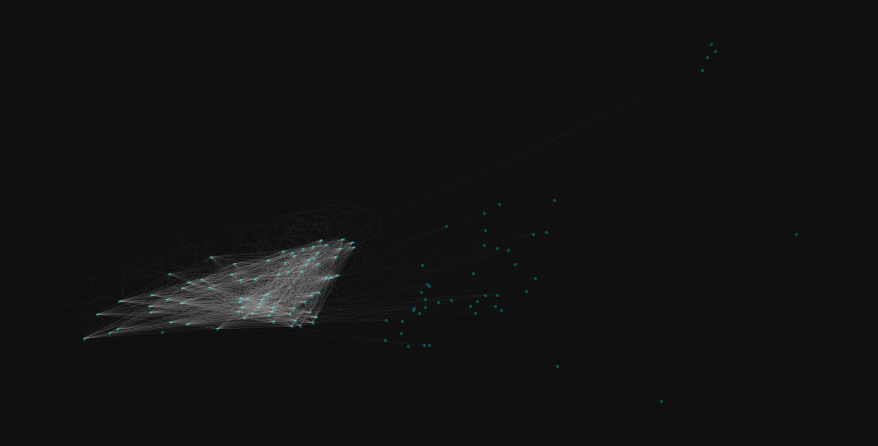

In [29]:
#visualize the network
fig = plt.figure(figsize = (12,6))
nx.draw(sep_rides, pos=stations, with_labels=False, arrows=False, node_size=5,
       node_color='cyan', alpha=0.2, style='dotted', edge_color='white', width=0.2)
fig.set_facecolor("#101010")

In [30]:
fig = px.scatter_mapbox(tot,
                    lat='start_lat',
                    lon='start_lng',
                        color_discrete_sequence=px.colors.qualitative.Plotly,
                       mapbox_style='dark',
                        size = 'count',
                        hover_data = {'start_station_name': True})

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.update_layout(mapbox_zoom=10, 
                  mapbox_center = {"lat": 40.776789, "lon": -73.970212})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

##Check other centrality scores of stations
* Degree centrality
* Eigenvector centrality

In [31]:
#output top ten centrality scores, given the dictionary d
def topdict(d,tn):
#     ind=sorted(d, key=dict(d).get, reverse=True)
    ind = sorted(dict(c1), key=dict(c1).__getitem__, reverse=True)
    for i in range(0,tn):
        print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

Now compute five centrality metrics - degree, eigenvector, betweenness, closeness and pagerank - and output top 10 stations in terms according to those metrics

In [32]:
# Degree centrality
c1= nx.degree(sep_rides)
topdict(c1,10)

1|Washington St:148
2|Columbus Dr at Exchange Pl:147
3|Grove St PATH:146
4|Newport Pkwy:145
5|Newport PATH:143
6|Hamilton Park:143
7|Marin Light Rail:141
8|Newark Ave:141
9|Warren St:140
10|Hoboken Terminal - River St & Hudson Pl:139


In [33]:
# Eigenvector centrality
c2= nx.eigenvector_centrality(sep_rides)
topdict(c2,10)

1|Washington St:0.1404805800186707
2|Columbus Dr at Exchange Pl:0.13682346860076758
3|Grove St PATH:0.1399269409089418
4|Newport Pkwy:0.14170729603403545
5|Newport PATH:0.14038259829403182
6|Hamilton Park:0.1398928768827198
7|Marin Light Rail:0.1338906463993639
8|Newark Ave:0.14077907008482896
9|Warren St:0.13698207650924793
10|Hoboken Terminal - River St & Hudson Pl:0.13710108292305767


In [34]:
#Betweenness centrality
c3 = nx.betweenness_centrality(sep_rides)
topdict(c3,10)

1|Washington St:0.010494682021621071
2|Columbus Dr at Exchange Pl:0.01989123567451716
3|Grove St PATH:0.013534573515349056
4|Newport Pkwy:0.0032866646812821023
5|Newport PATH:0.003020512884100772
6|Hamilton Park:0.0032281066009203995
7|Marin Light Rail:0.019667430288971208
8|Newark Ave:0.007949447783973107
9|Warren St:0.0030091160157901266
10|Hoboken Terminal - River St & Hudson Pl:0.006516287531062556


In [35]:
#Closeness centrality
c4 = nx.closeness_centrality(sep_rides)
topdict(c4,10)

1|Washington St:0.5921111111111111
2|Columbus Dr at Exchange Pl:0.5767316017316017
3|Grove St PATH:0.5921111111111111
4|Newport Pkwy:0.6001126126126126
5|Newport PATH:0.5921111111111111
6|Hamilton Park:0.5921111111111111
7|Marin Light Rail:0.5621308016877636
8|Newark Ave:0.5921111111111111
9|Warren St:0.5767316017316017
10|Hoboken Terminal - River St & Hudson Pl:0.5767316017316017


##Visualize the network with the node size proportional to the degree centrality (or any other centrality)

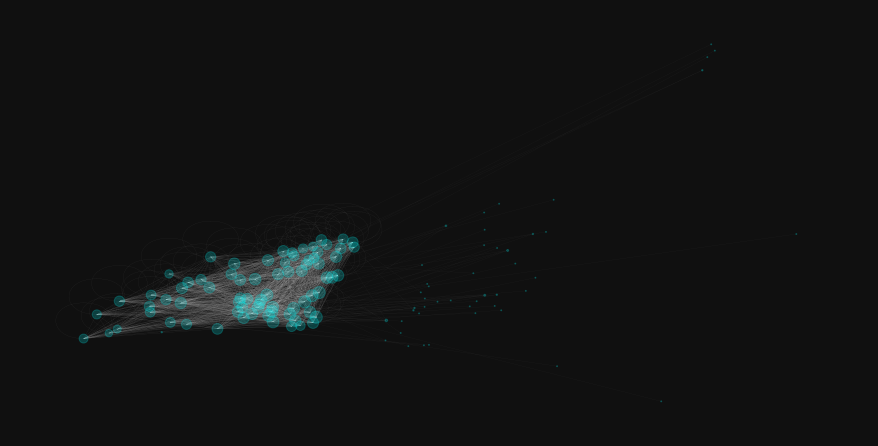

In [36]:
node_size_original = list(dict(c1).values()) # based on degree centrality

#visualize the network
fig = plt.figure(figsize = (12,6))
nx.draw(sep_rides, pos=stations, with_labels=False,arrows=False, 
        node_size=node_size_original, 
       node_color='cyan', alpha=0.2, style='dotted', edge_color='white', width=0.2)
fig.set_facecolor("#101010")